## This is a general introduction to t-tests and p-values for the TDI interview.

In [3]:
options(repos = c('https://cloud.r-project.org/'))
install.packages(c("ggplot2", "dplyr", "sciplot", "repr"))

Installing packages into 'C:/Users/nrb75/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'sciplot' successfully unpacked and MD5 sums checked
package 'repr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nrb75\AppData\Local\Temp\RtmpW0IsnA\downloaded_packages


Let's say you have two groups of friends, those you met in undergrad and those you met in graduate school. You suspect that the IQ's of these two groups are different, but how do you know for sure? The t-test! 


### You use a t-test to compare the means (averages) between two groups and determine if one group is different than the other. 
Statistics help us do more than just compare the means. After all, many groups can have the same mean with drastically different individual scores.

Let's take a look at some of the IQ scores for these two groups:

In [4]:
friendIQ=read.csv("SampleData/FriendIQ.csv")
head(friendIQ)

undergrad,grad
85,94
88,96
91,96
93,97
97,98
99,102


Let's look at some summary statistics for each group:

In [5]:
sum.stat=function(x) {round(c(mean=mean(x), median=median(x), sd=sd(x), max=max(x), obs=length(x)),2)}
sum.data=sapply(friendIQ, sum.stat)
sum.data

,undergrad,grad
mean,102.94,107.69
median,100.00,106.50
sd,13.50,10.81
max,140.00,128.00
obs,16.00,16.00


hmmmmm, it seems like the undergrad group has lower IQ scores than the graduate group. If we want to test this, we need to use a t-test. 

A t-test, like all statistical tests, calculates a 'test statistic' and compares it to a known 'critical value'. If the test statistic is larger than the critical value, we then conclude that our result is not due to chance and is a 'real' result. When this occurs we 'reject the null hypothesis'. The null hypothesis is usually benign, for example, "the treatment had no effect on patient survival" or "group A and B lost the same amount of weight". We are really interested in what happens if we reject the null. For example, we can say "the treatment did effect patient survival" and we want to invest more money in this drug development.


A critical value is calculated with the sample data characterisitics (i.e, degrees of freedom, and distribution) and a selected error rate. An error rate $\alpha$, is usually set at 0.05, and this means there is a 5% chance the result is due to random error and not a real result. This error rate is called the $p-value$, and the lower the p-value the lower the chance that our result is due to random chance. Small p-values indicate real results, not those from randomness.

We can visualize this error rate by looking at a normal curve and calculating the area under the cuve, the area to the right of our value is equal to the error rate.
##### For 1-tailed test, the area to the right of the critical value = 0.05, shown below in gray.

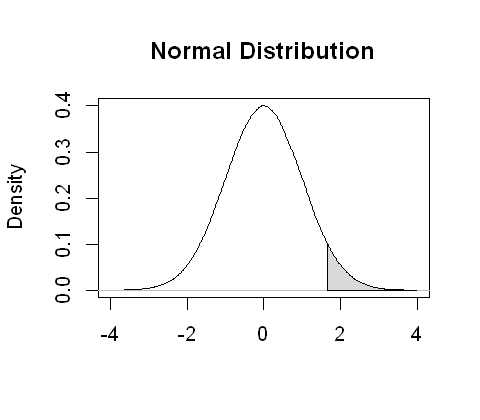

In [6]:
options(repr.plot.width=4, repr.plot.height=3.5)
draws <- rnorm(1000000, mean=0, sd=1) #random values from t-distribution
dens <- density(draws) #desnity distribution of random draws from t-distribution
criticalvaluehigh=quantile(draws, .95) #critical value of upper tail

indexhigh=min(which(dens$x >=criticalvaluehigh)) #critical value high
right=max(which(dens$x<4)) #end. The area between indexhigh and right should be 0.025

plot(dens, xlim=c(-4,4), xlab="", main="Normal Distribution")
with(dens, polygon(x=c(x[c(indexhigh,indexhigh:right,right)]), y= c(0, y[indexhigh:right], 0), col="gray85")) #high tail

If our data calculates a test statistic larger than the critical value, then the area (or error rate) is less than 5%. This is the error we are able to tolerate, but if you are more conservative you can shrink this error and increase the critical value to ensure an even lower error rate. This can also be called a 

The dark gray area below represents our data where we are more certain (error rate <0.05) our data is a real result.


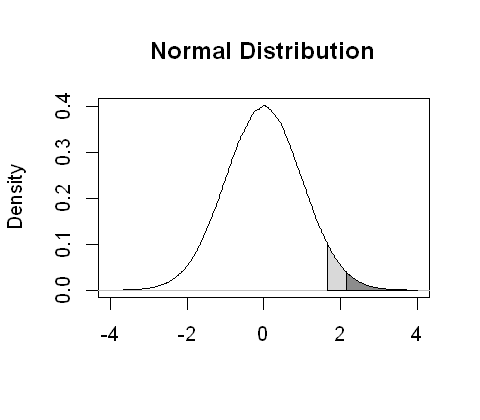

In [7]:
draws <- rnorm(1000000, mean=0, sd=1) #random values from t-distribution
dens <- density(draws) #desnity distribution of random draws from t-distribution
criticalvaluehigh=quantile(draws, .95) #critical value of upper tail

indexhigh=min(which(dens$x >=criticalvaluehigh)) #critical value high
indexhigh2=min(which(dens$x >=criticalvaluehigh+0.5))#new data critical value higher than 0.05 threshold
right=max(which(dens$x<4)) #end. The area between indexhigh and right should be 0.025

plot(dens, xlim=c(-4,4), xlab="", main="Normal Distribution")
with(dens, polygon(x=c(x[c(indexhigh,indexhigh:right,right)]), y= c(0, y[indexhigh:right], 0), col="gray85")) #high tail
with(dens, polygon(x=c(x[c(indexhigh2,indexhigh2:right,right)]), y= c(0, y[indexhigh2:right], 0), col="gray55"))#new data with a greater test statistic

Conversely, if our data calculates a test statisitc lower than the critical value, then the area is greater than 5%, and we have a larger error rate than we want. The dark gray area below is >0.05 (larger than the light gray area) and this means we are less certain that the results are real, and we would not reject the null hypothesis.

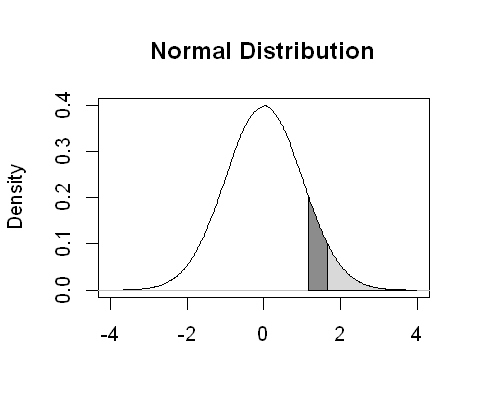

In [8]:
draws <- rnorm(1000000, mean=0, sd=1) #random values from t-distribution
dens <- density(draws) #desnity distribution of random draws from normal-distribution
criticalvaluehigh=quantile(draws, .95) #critical value of upper tail

indexhigh=min(which(dens$x >=criticalvaluehigh)) #critical value high
indexhigh3=min(which(dens$x >=criticalvaluehigh-0.5))#new data critical value lower than 0.05 threshold
right=max(which(dens$x<4)) #end. The area between indexhigh and right should be 0.025

plot(dens, xlim=c(-4,4), xlab="", main="Normal Distribution")
with(dens, polygon(x=c(x[c(indexhigh3,indexhigh3:right,right)]), y= c(0, y[indexhigh3:right], 0), col="gray55"))#new data with a greater test statistic
with(dens, polygon(x=c(x[c(indexhigh,indexhigh:right,right)]), y= c(0, y[indexhigh:right], 0), col="gray85")) #high tail

### Now that we know that a t-test is calculating a value we use to assess how likely our results are due to chance (the p-value). It's time to go back to our undergrad vs. grad IQ scores and see which group is smarter!

Before we can use this statistical test, we have to first make sure our data satisfies the assumptions of the t-test. The assumptions are:

1. The data are continuous
2. The data follow a normal distribution
3. The samples are independent
4. The two groups have approximately equal variance

###### Assumption 1 is satisfied because these IQ scores could be any value on the scale. 
Even though the IQ scores are reported as discrete values (e.g., 100 and not 100.044), the IQ score could be any value and is not constrained as in other situations like a clinical trial with the number of cancer patients (there cannot be half a patient).



###### Assumption 2 can be checked by examining the data distribution for both groups.
A normal distribution follows a bell-curve. Let's look at the histograms of each group:

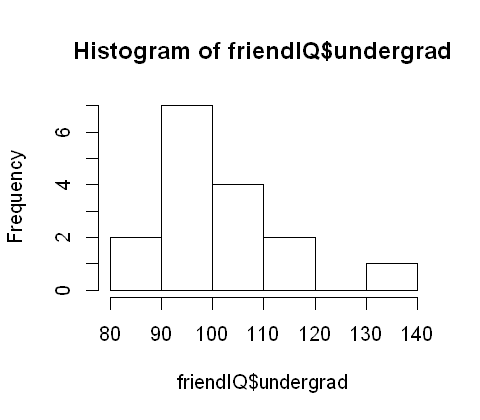

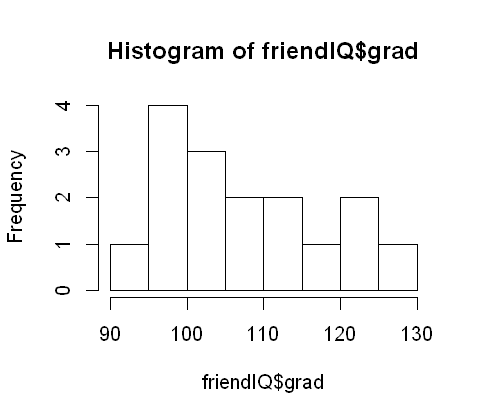

In [9]:
options(repr.plot.width=4, repr.plot.height=3.5)
hist(friendIQ$undergrad)
hist(friendIQ$grad)

#Important for inference, even when underlying distributions are not
#normal, the sampling distribution of the sample mean is
#approximately normal

If the data were normal, we would expect it to follow the typical bell-shaped curve seen above. However, because our sample size is small, these histograms could actually come from a normal distribution. Here are some histograms generated with 16 observations from the normal distribution:

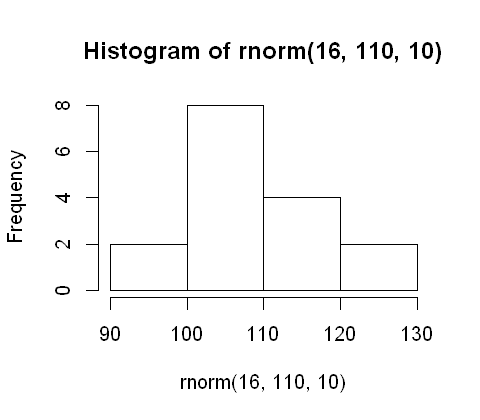

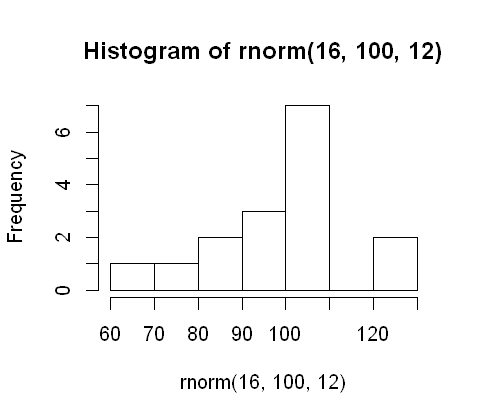

In [10]:
hist(rnorm(16, 110,10))

hist(rnorm(16, 100, 12))

##### We can test normality by completing shapiro-wilk test (the null hypothesis is that the data is normal):

In [11]:
shapiro.test(friendIQ$grad)


	Shapiro-Wilk normality test

data:  friendIQ$grad
W = 0.92722, p-value = 0.2202


Because the p-value is large (above the 0.05 threshold), this leads us to conclude the data is normal and not reject the null hypothesis.

###### Assumption 3, that the data are independent, is true because these are individual results from each person. 
One person's IQ is not affecting the other person's IQ. If people in the group were related or shared the same high schools, the observations would not be independent. Luckily, all my friends were from different high schools and I wasn't friends with any siblings, so these are independent observations!

###### Assumption 4, that the groups have equal variance, is checked by looking at the Q-Q plots:

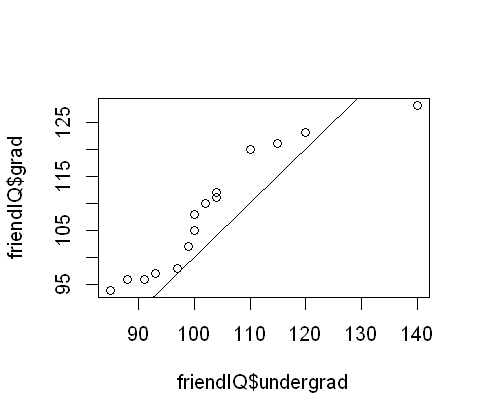

In [12]:
qqplot(friendIQ$undergrad, friendIQ$grad)
abline(0,1)


Unfortunately, it appears the quantiles for each group are not the same, and they have unequal variances. Lucky for us, a correction to the t-test can control for unequal variance. This uses a Welch's t-test and is the default used below. 

### Now that we satisfied our assumptions to use the t-test, let's find out if our friend groups really do have different IQs! 

We will use the two sample t-test, where the null hypothesis is that the means of both groups are equal. 

Ho: mean undergrad IQ = mean grad IQ or
    mean undergrad IQ - mean grad IQ = 0

In [13]:
testIQ=t.test(friendIQ$undergrad, friendIQ$grad)
testIQ


	Welch Two Sample t-test

data:  friendIQ$undergrad and friendIQ$grad
t = -1.0989, df = 28.629, p-value = 0.281
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.595701   4.095701
sample estimates:
mean of x mean of y 
 102.9375  107.6875 


### Let's walk through these results. First, your burning question is answered: Do my friend groups have different IQs???

#### The answer is 'NO'. 

How do we know this? The p-value is > 0.05, and suggests this observed difference is likely due to chance and not a true difference in the groups. The p-value of 0.28 suggests that there is a 28% chance due to randomness that the mean IQ of the undergrad and grad group are actually different. 
If each group is a random sampling from the larger population (i.e, the undergraduate school vs the graduate school) and this experiment were repeated many more times, you would likely see no difference in IQ means between the two groups.

How was this test done? Can I believe it?

The t-test calculated the t-value (test statistic) and then calculated the area above this value. This is a two-tailed test, and the two tails are added together for a total area or p-value.

##### The t-value is calculated by comparing the two groups:

$$t = y_1 - y_2/ \sqrt{S_1^2/n_1 + S_2^2/n_2}$$

$y_1 and\ y_2$ = group means

$S_1 and\ S_2$ = group standard deviations 

$n_1 and\ n_2$ = number of observations in each group

The bigger this t value is, the more likely the p-value is to be small. Why is this? The t value increases when the difference between the groups increases $(y_1 - y_2)$, or when the denominator is very small (large $n$ sample size or small  $S$ standard deviations).

Because the null hypothesis is that the mean IQs are different (but not that 1 group is greater than the other), this means we need to consider both scenarios where undergrad IQ is larger and smaller than grad. Now, instead of the area to the right of the critical value = 0.05, it will be 0.025 and we will have two tails! The total error rate is still 0.05; lower tail area(0.025) + upper tail area(0.025)=0.05

The critical values for an error of 5% (total area of 0.05) are shown below in light gray. The calculated t-values (-1.09 and 1.09) and corresponding areas are shown in dark gray:

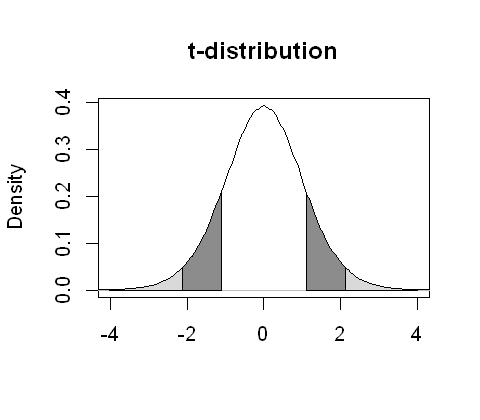

In [14]:
draws <- rt(1000000, df=15) #random values from t-distribution
dens <- density(draws) #desnity distribution of random draws from t-distribution
criticalvaluelow=quantile(draws, .025) #critical value of lower tail
criticalvaluehigh=quantile(draws, .975) #critical value of upper ail

left=max(which(dens$x<=-4)) #zero, or starting point
indexlow=max(which(dens$x <=criticalvaluelow)) #critical value low, the area between left and indexlow should be 0.025 (half the allowable 0.05)
indexhigh=min(which(dens$x >=criticalvaluehigh)) #critical value high

indexlow1=max(which(dens$x <=testIQ$statistic))#calculated t-value low
indexhigh1=min(which(dens$x >=abs(testIQ$statistic))) #calculated t-value high
right=max(which(dens$x<4)) #end. The area between indexhigh and right should be 0.025


plot(dens, xlim=c(-4,4), xlab="", main="t-distribution")
with(dens, polygon(x=c(x[c(left,left:indexlow1,indexlow1)]), y= c(0, y[left:indexlow1], 0), col="gray55")) #low tail actual data
with(dens, polygon(x=c(x[c(indexhigh1,indexhigh1:right,right)]), y= c(0, y[indexhigh1:right], 0), col="gray55")) #high tail actual data
with(dens, polygon(x=c(x[c(left,left:indexlow,indexlow)]), y= c(0, y[left:indexlow], 0), col="gray85")) #low tail
with(dens, polygon(x=c(x[c(indexhigh,indexhigh:right,right)]), y= c(0, y[indexhigh:right], 0), col="gray85")) #high tail


Wow! The dark gray area is much larger than the light gray! This shows that our data has a much higher error rate (28% from p-value=0.28) than the allowable 5%. 

#### This does not give us confidence that the groups are actualy different, we do not have enough evidence to reject the null hypotheis that the average IQ is approximately equal for both groups.

How confident are we in this result?
Let's look at the output again:

In [15]:
testIQ


	Welch Two Sample t-test

data:  friendIQ$undergrad and friendIQ$grad
t = -1.0989, df = 28.629, p-value = 0.281
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.595701   4.095701
sample estimates:
mean of x mean of y 
 102.9375  107.6875 


The 95% confidence interval shows the interval where we are 95% confident the true difference between these two groups lies within this range. The 9% CI is [-13.5, 4.1]. This indicates that the true difference between these groups could be between -13.5 and 4.1, and contains the null value 0. Thus, while we cannot reject the null, there could really be a big difference in these groups and our sample size was not large enough to detect this.

If we collect more data, mabye we can make our measurements more precise and increase our statistical power.

In [21]:
friendIQ2=read.csv("SampleData/FriendIQ2.csv")
testIQ2=t.test(friendIQ2$undergrad, friendIQ2$grad)
testIQ2


	Welch Two Sample t-test

data:  friendIQ2$undergrad and friendIQ2$grad
t = -5.6196, df = 64.042, p-value = 4.471e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -17.737507  -8.433922
sample estimates:
mean of x mean of y 
 100.7714  113.8571 


Now we have a significant result (p<0.05), and we reject the null that the difference in IQ between these groups is 0. Let's see how the data changed from our original samples (first table) to the new data (second table).

In [22]:
sum.data2=sapply(friendIQ2, sum.stat)
sum.data
sum.data2

,undergrad,grad
mean,102.94,107.69
median,100.00,106.50
sd,13.50,10.81
max,140.00,128.00
obs,16.00,16.00


,undergrad,grad
mean,100.77,113.86
median,100.00,118.00
sd,8.44,10.88
max,140.00,129.00
obs,35.00,35.00


The standard deviation $S$ decreased in our Undergrad measurements, and the difference betweenthe means $y_1 - y_2$ increased. This led to a larger absolute t value, and a smaller p-value. So, it was easier to notice this true difference between the groups when we increased our sample size.

### Other uses for the t-test

The t-test is a jack of all trades! It can also be used to calculate:
- if the mean of a sample is equal to a hypothesized value
- if the estimated slope in a regression is significantly different than 0
- if paired data (ex before and after study) is significantly different